<a href="https://colab.research.google.com/github/Cudiyildiz/makineOgrenmesi_vize/blob/main/makineOgrenmesi_vize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from scipy.spatial import distance
from scipy.stats import entropy

Bu kod parçası, makine öğrenimi için kullanılan temel kütüphaneleri ve işlevleri içerir. Veri yükleme, ön işleme ve çeşitli sınıflandırma/regresyon algoritmalarının uygulanmasını sağlar.

In [ ]:
data = pd.read_csv("veri-seti.txt", delimiter="\t")

Bu kod veri setini projemize ekler.

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

Bu kod ise bizim özniteliklerimizi ve aynı zamanda hedef değişkenlerimizi ayırır.

In [ ]:
print("Boş değerlerin sayısı:")
print(X.isnull().sum())

Bu kod satırı bizim veri setimizde boş veriler varmı yokmu onu inceler.

In [ ]:
print("Özniteliklerin tipleri:")
print(X.dtypes)


Bu kod verilerin hangi tipte olduğunu belirler.

In [ ]:
print("Özniteliklerin Entropi Değerleri:")
for column in X.columns:
    column_entropy = entropy(X[column].value_counts(normalize=True), base=2)
    print(f"{column}: {column_entropy}")

Bu kod parçası bize özniteliklerin entropi değerini verir ,bu sayede verilerin bilgi miktarını almıi oluruz.Örnek verecek olursak 6 verisi 148 verisine göre bize daha homojen bir bilgiye sahip olduğunu gösterir.


In [ ]:
mean_std = X.std()

bu kısım ise bizim veri setindeki herbir verimizin standart sapmasını hesaplar.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Bu kod parçası veri kümesinin eğitim ve test veri setlerine ayırmak için kullanılmaktadır.Veri setimizde %70 eğitim seti %30 da test seti olarak ayırdık.

In [ ]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

Bu kodda veri setindeki öznitelik değerlerini satndartlaştırıp her bir özniteliğin değerini 0 yada 1 yapar.Kısaca normalizasyon yapmaktadır.

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

Bu kod parçası Temel Bileşen Analizi (PCA) dediğimiz yöntem ile veri setimizde bulunan özniteliklerin boyutunu azaltarak modeldeki karmaşıklığı önleyerek daha hızlı çalışmasını sağlar.

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=min(X_train_normalized.shape[1], len(set(y_train)) - 1))
X_train_lda = lda.fit_transform(X_train_normalized, y_train)
X_test_lda = lda.transform(X_test_normalized)

Bu kod parçası ise bizim ,Doğrusal Diskriminant Analizi(LDA) fonksiyonunu kullanarak veri setindeki öznitelik boyutunu düşürerek sınıfların arasındaki ayrımı en üst düzeye çıkararak yeni bir öznitelik uzayı oluşturur.Buda bizim sınıflandırma perfornsımızı artırır.

In [ ]:
print("PCA ve LDA için en ayırt edici öznitelikler:")#PCA ve LDA için en ayırt edici öznitelikler
print("PCA components:\n", pca.components_)#PCA katsayıları
print("LDA coefficients:\n", lda.coef_)#LDA katsayıları

In [ ]:
oklid_distance = distance.euclidean(X_train_pca[0], X_test_pca[0])
print("Oklid Uzaklığı:", oklid_distance)

Bu kodda ise PCA ile dönüştürülmüş örnekler arasındaki öklid uzaklığını hesaplar.Bu uzaklık iki nokta arasındaki en ksıa mesafeyi ölçer.

In [ ]:
minkowski_distance = distance.minkowski(X_train_pca[0], X_test_pca[0])
print("Minkowski Uzaklığı:", minkowski_distance)

bu kod minkowski uzaklığını hesaplar.Öklid uzaklığı gibi iki nokta arasındaki uzaklığı hesaplar ancak öklidden farkı farklı bir değer ile genleşmesidir.

In [ ]:
variance = X.var()
covariance_matrix = X.cov()
print("Özniteliklerin Varyansı:")
print(variance)
print("\nÖzniteliklerin Kovaryans Matrisi:")
print(covariance_matrix)

Bu kod veri setindeki özniteliklerin varyans ve koveryans matrislerini hesaplar.

In [ ]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_normalized, y_train)
linear_reg_coef = linear_reg_model.coef_
print("\nÇoklu Doğrusal Regresyon Katsayıları:")
print(linear_reg_coef)



Çoklu Doğrusal Regresyon Katsayıları:
[ 0.07379726  0.18212686 -0.01615283  0.0152169  -0.00509628  0.08563135
  0.05266221  0.02509427]


Bu kod çoklu doğrusal regrasyon modelini oluşturup eğitir, ardından modelin katsayılarını alır ve ekrana yazar.

In [ ]:
logistic_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs') #reglasyon modelini oluşturur
logistic_reg_model.fit(X_train_normalized, y_train) #Oluşturalan regrasyon modelini eğitir.
logistic_reg_accuracy = logistic_reg_model.score(X_test_normalized, y_test)#Eğitilen regrasyon modelinin dogruluk oranını hesaplar.
logistic_reg_coef = logistic_reg_model.coef_#Eğitilen regrasyon modelinin katsayılarını hesaplar.
y_pred_logistic_reg = logistic_reg_model.predict(X_test)#Eğitilen regrasyon modelinin tahminlerini hesaplar.
logistic_reg_precision = metrics.precision_score(y_test, y_pred_logistic_reg)#Eğitilen regrasyon modelinin precision(hasasiyet) oranını hesaplar.
logistic_reg_recall = metrics.recall_score(y_test, y_pred_logistic_reg)#Eğitilen regrasyon modelinin recall(hassasiyet) oranını hesaplar.
logistic_reg_f1_score = metrics.f1_score(y_test, y_pred_logistic_reg)#Eğitilen regrasyon modelinin f1 skoru hesaplar.
print("\nMultinominal Lojistik Regresyon Katsayıları:")
print(logistic_reg_coef)

bu kod parçası, çok sınıflı regrasyon modelini oluşturur,eğitir ve performansını değerlendirir.Aynı zamanda bu modelin performans katsayılarını verip ekrana yazdırır.

In [ ]:
decision_tree_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, criterion='entropy') #Karar ağacı modelini oluşturur.
decision_tree_model.fit(X_train, y_train) #Karar ağacı modelini eğitir.
y_pred_decision_tree = decision_tree_model.predict(X_test) #Eğitilen karar ağacı modelinin tahminlerini hesaplar.
decision_tree_accuracy = metrics.accuracy_score(y_test, y_pred_decision_tree) #Eğitilen karar ağacı modelinin dogruluk oranını hesaplar.
decision_tree_precision = metrics.precision_score(y_test, y_pred_decision_tree) #Eğitilen karar ağacı modelinin precision(hasasiyet) oranını hesaplar.
decision_tree_recall = metrics.recall_score(y_test, y_pred_decision_tree) #Eğitilen karar ağacı modelinin recall(hasasiyet) oranını hesaplar.
decision_tree_f1_score = metrics.f1_score(y_test, y_pred_decision_tree) #Eğitilen karar ağacı modelinin f1 skoru hesaplar.

Bu kod ise karar ağacı sınıflandırma modelini oluşturur.Eğitir ve performans değerlendirmesi yapar.

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt_classifier = dt_classifier.predict(X_test)
dt_accuracy = metrics.accuracy_score(y_test, y_pred_dt_classifier)
dt_precision = metrics.precision_score(y_test, y_pred_dt_classifier)
dt_recall = metrics.recall_score(y_test, y_pred_dt_classifier)
dt_f1_score = metrics.f1_score(y_test, y_pred_dt_classifier)

bu kodda karar ağacı oluşturuyor. Yukardakinden farkı ise varsayılan parametrelerle bir karar ağacı sınıflandırması yapar.

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=True)
plt.title("Karar ağacı")
plt.show()

Yukarıda oluşturulan ikinci karar ağacının görselleştirilmesini sağlar.

In [ ]:
dt_classifier_pruned = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_classifier_pruned.fit(X_train, y_train)

Bu kod ise bizim yukarıda oluşturduğumuz karar ağacının budanmış halini oluşturur.

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt_classifier_pruned, filled=True, feature_names=X.columns, class_names=True)
plt.title("Karar ağacının budanmış hali")
plt.show()

Budanmış karar ağacının görselleştirilmesini sağlar.

In [ ]:
naive_bayes_model = GaussianNB()#Naive bayes modelini oluşturur.
naive_bayes_model.fit(X_train, y_train)#Naive bayes modelini eğitir.
y_pred_naive_bayes = naive_bayes_model.predict(X_test)#Eğitilen naive bayes modelinin tahminlerini hesaplar.
naive_bayes_accuracy = metrics.accuracy_score(y_test, y_pred_naive_bayes)#Eğitilen naive bayes modelinin dogruluk oranını hesaplar.
naive_bayes_precision = metrics.precision_score(y_test, y_pred_naive_bayes)#Eğitilen naive bayes modelinin precision(hasasiyet) oranını hesaplar.
naive_bayes_recall = metrics.recall_score(y_test, y_pred_naive_bayes)#Eğitilen naive bayes modelinin recall(hasasiyet) oranını hesaplar.
naive_bayes_f1_score = metrics.f1_score(y_test, y_pred_naive_bayes)#Eğitilen naive bayes modelinin f1 skoru hesaplar.

Yuakrdaki kod parçası bize Goussian Naive Bayes sınıflandırıcısını oluşturu ve eğitir. Bu sınıflandırıcı olasılık temelli bir algoritma kullanarak verileri sınıflandırır.

In [ ]:
metrics_table = pd.DataFrame({
    "Model": ["Çoklu Doğrusal Regresyon", "Multinominal Lojistik Regresyon", "Karar Ağacı", "Naive Bayes"],
    "Accuracy": [decision_tree_accuracy, logistic_reg_accuracy, decision_tree_accuracy, naive_bayes_accuracy],
    "Precision": [decision_tree_precision, logistic_reg_precision, decision_tree_precision, naive_bayes_precision],
    "Recall": [decision_tree_recall, logistic_reg_recall, decision_tree_recall, naive_bayes_recall],
    "F1 Score": [decision_tree_f1_score, logistic_reg_f1_score, decision_tree_f1_score, naive_bayes_f1_score]
})
print(metrics_table)


                             Model  Accuracy  Precision  Recall  F1 Score
0         Çoklu Doğrusal Regresyon  0.722944   0.608108  0.5625  0.584416
1  Multinominal Lojistik Regresyon  0.792208   0.346320  1.0000  0.514469
2                      Karar Ağacı  0.722944   0.608108  0.5625  0.584416
3                      Naive Bayes  0.722944   0.621212  0.5125  0.561644


Bu kodda ise çoklu doğruasl regrasyon, multimomal lojistik regrasyon,karar ağacı, naive bayes gibi model ve regrasyon yapılarının accuracy'lerini ,presicon,recall,f1-score gibi parmetreleri oluşturulan tabloda görebilirsiniz.

kod çalıştığında her modelin performanısını farklı olduğunu göreceksiniz, örnek verecek olursam "Multinominal Lojistik Regresyon" modeli, gerçek pozitifleri iyi bir şekilde tespit ediyor (duyarlılık yüksek), ancak yanlış pozitif tahminler yapabiliyor(hassasiyet düşük). Buda modelin doğru hasta olgularını tanıma konusunda iyi olduğunu, ancak sağlıklı olguları yanlışlıkla hasta olarak sınıflandırabileceğini bize gösteriyor kısaca

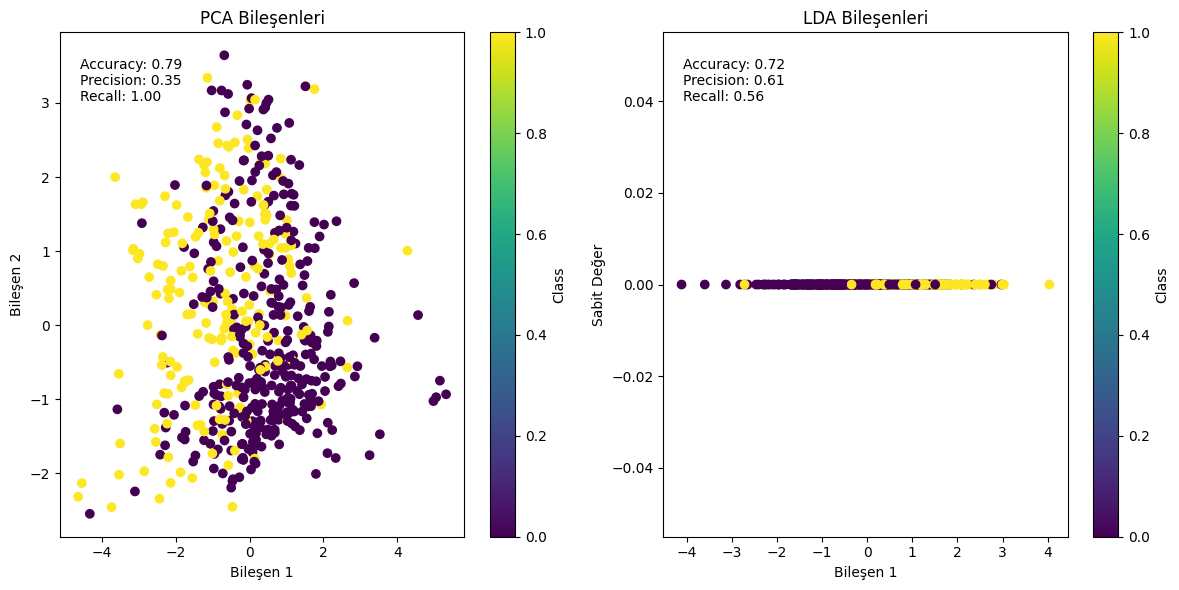

In [ ]:
# PCA bileşenlerinin görselleştirilmesi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('PCA Bileşenleri')
plt.scatter(x=X_train_pca[:, 0], y=X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Bileşen 1')
plt.ylabel('Bileşen 2')
plt.colorbar(label='Class')
plt.text(0.05, 0.95, f"Accuracy: {logistic_reg_accuracy:.2f}\nPrecision: {logistic_reg_precision:.2f}\nRecall: {logistic_reg_recall:.2f}", transform=plt.gca().transAxes, verticalalignment='top')
# LDA bileşenlerinin görselleştirilmesi
plt.subplot(1, 2, 2)
plt.title('LDA Bileşenleri')
plt.scatter(x=X_train_lda[:, 0], y=np.zeros_like(X_train_lda[:, 0]), c=y_train, cmap='viridis')
plt.xlabel('Bileşen 1')
plt.ylabel('Sabit Değer')
plt.colorbar(label='Class')
plt.text(0.05, 0.95, f"Accuracy: {decision_tree_accuracy:.2f}\nPrecision: {decision_tree_precision:.2f}\nRecall: {decision_tree_recall:.2f}", transform=plt.gca().transAxes, verticalalignment='top')
plt.tight_layout()
plt.show()

Bu kod PDA ve LDA bileşenlerinin karşılaştırılması ve iki grafik olarak görseleştirilmesi için kullanıldı.

bu grafikler bize veri setinin boyut indirgenmesinden sonra nasıl dağıldığını ve sınıfların birbirinden ne kadar ayrıldığını göstermektedir.Aynı zamanda grafik içerisinde PCA ve LDA blişenlerinin Accuracy,precision ve recall degerlerinin de bulunmaktadır.

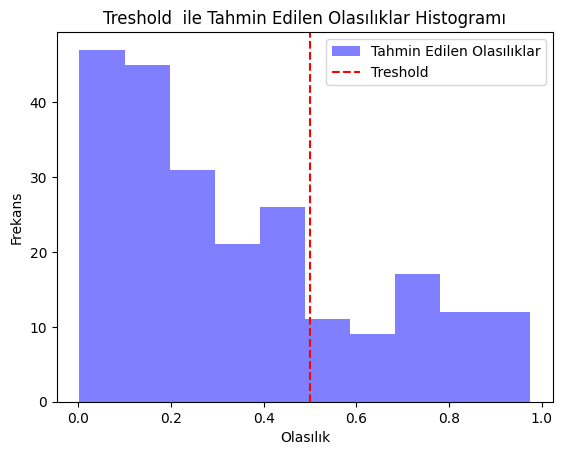

In [ ]:
y_pred_probabilities = logistic_reg_model.predict_proba(X_test_normalized)[:, 1]#Tahmin edilen olasılıkları hesaplar.
plt.hist(y_pred_probabilities, bins=10, alpha=0.5, color='blue', label='Tahmin Edilen Olasılıklar')#Tahmin edilen olasılıkların histogramını oluşturur.
treshold = 0.5 #Tahmin edilen olasılıkların teshit oranı.
plt.axvline(x=treshold, color='red', linestyle='--', label='Treshold')
plt.xlabel('Olasılık')
plt.ylabel('Frekans')
plt.title('Treshold  ile Tahmin Edilen Olasılıklar Histogramı')
plt.legend()
plt.show()


Bu kod, lojistik regresyon modelinin test verileri üzerindeki tahmin olasılıklarının histogramını çiziyor. Histogramda, modelin belirli bir eşik değeri (threshold) etrafındaki tahmin olasılıklarının dağılımı görselleştiriliyor. Bu, modelin belirli bir eşik değerine göre pozitif veya negatif tahmin yaptığı durumları görmemize yardımcı olur. Bu şekilde, modelin ne kadar güvenilir tahminler yaptığı veya belirli bir eşik değerinde nasıl performans gösterdiği hakkında fikir edinebiliriz.